In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import math
import csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# 1- Análisis estadístico

In [2]:
# Cargar el conjunto de datos en un marco de datos
Notas = pd.read_csv("DataSetGrades/NotasFuturas.csv")

#Varios valores estadisticos
print(Notas.describe())

        proyecto1   proyecto2    examen 1     taller1        nota
count  102.000000  102.000000  102.000000  102.000000  102.000000
mean    64.125490   65.312745   42.665686   69.585294   66.008235
std     32.082628   29.468697   20.549224   29.608938   26.003992
min      0.000000    0.000000    0.000000    0.000000    0.750000
25%     40.500000   60.000000   29.200000   60.000000   60.435000
50%     70.800000   70.000000   41.650000   79.300000   74.430000
75%     94.750000   93.325000   56.850000  100.000000   81.752500
max    100.000000  100.000000   86.500000  100.000000   97.610000


In [3]:
# Calcular la matriz de correlación
corr = Notas.corr()

# Cuales son los resultados que se tiene de diabetes.
columnas = Notas["nota"].unique()

print(columnas)


[80.2   2.5  80.8  82.1  69.4  76.6  70.7  79.3  67.6  77.6  75.2  72.4
 78.6  25.9  67.9  50.2  68.2  82.9  76.3   2.   58.   68.3  73.1  69.6
 96.   64.97 79.64 11.69 10.8  96.1  70.44 91.5  54.59 91.8  69.24 76.9
 76.11 79.03 77.23  5.92 75.11 97.61 80.09 77.12 58.13 43.75 83.63 74.67
 81.16 73.35 81.03  1.25 78.57 78.19 92.61 72.41 93.99 79.1  47.13  4.09
 76.16 81.95 73.36 79.32 73.19  0.9  70.08 91.02 73.41 94.97 87.85 84.43
 67.94 10.86 66.38 59.96 74.19  0.75 61.86 38.39 39.24 87.62 87.61 10.44
 88.7  22.01 36.27 59.59 44.57 23.79 85.18 88.17 88.04 68.76 87.66 84.18
 87.47 86.24 87.31 69.37]


# 2- Visualización de los datos

<Axes: >

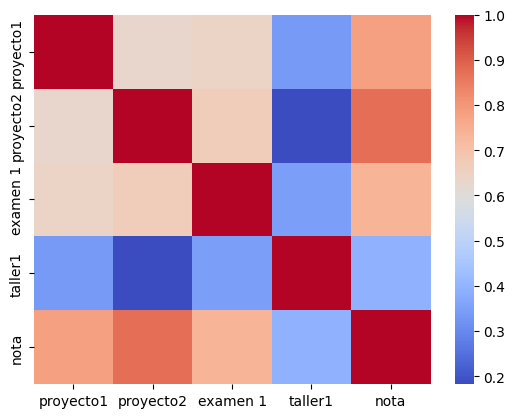

In [4]:
# Graficar la matriz de correlación utilizando un mapa de calor
sns.heatmap(corr, cmap='coolwarm')

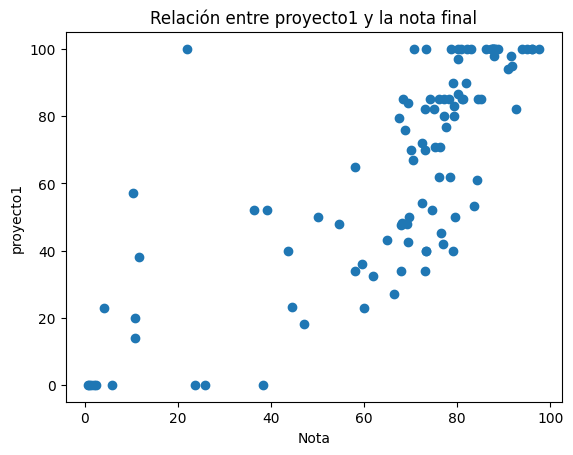

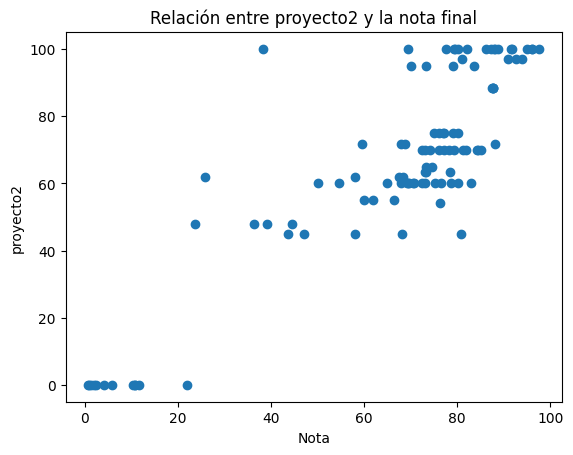

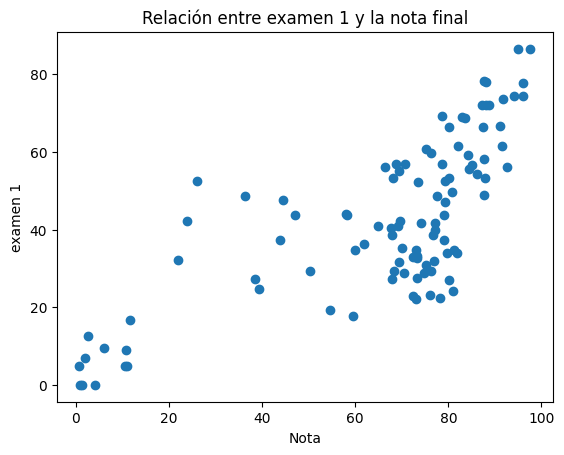

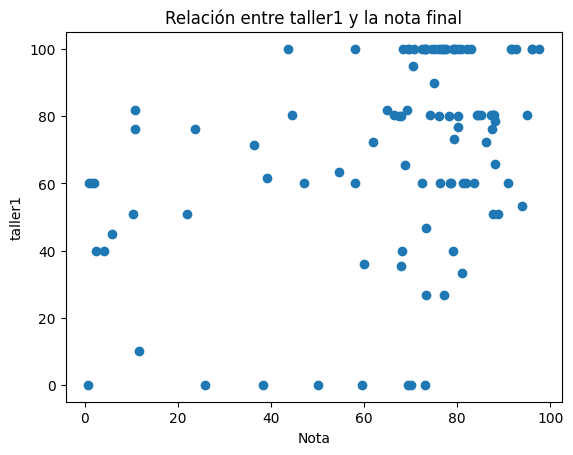

In [5]:
# Crea la gráfica de disperción

# Obtenemos una lista de todas las columnas del conjunto de datos, excepto la columna de calidad
features = Notas.columns[:-1]

# Creamos un gráfico de dispersión para cada característica
for feature in features:
    # Creamos el gráfico de dispersión
    plt.scatter(Notas['nota'],Notas[feature])
    
    # Agregamos etiquetas de los ejes y un título
    plt.ylabel(feature)
    plt.xlabel('Nota')
    plt.title(f'Relación entre {feature} y la nota final')
    
    # Mostramos el gráfico
    plt.show()

# 3- Normalización

In [6]:
# Imputar valores faltantes
imputer = SimpleImputer(strategy="median")
imputed_data = pd.DataFrame(imputer.fit_transform(Notas), columns=Notas.columns)

# Eliminar valores atípicos
q1 = Notas.quantile(0.25)
q3 = Notas.quantile(0.75)
iqr = q3 - q1
Notas = Notas[~((Notas < (q1 - 1.5 * iqr)) | (Notas > (q3 + 1.5 * iqr))).any(axis=1)]

# Normalizar las variables de entrada
scaler = MinMaxScaler()

# Normalizamos todo el conjunto de datos
NotasNormalizadas = scaler.fit_transform(imputed_data)

# Convertimos el resultado a un nuevo DataFrame de pandas
data_normalized = pd.DataFrame(NotasNormalizadas, columns=Notas.columns)

# Guardar los datos normalizados en un nuevo archivo CSV
#data_normalized.to_csv("DataSetGrades/NotasFuturas-Normalizadas.csv", index=False)

print(data_normalized.head())

   proyecto1  proyecto2  examen 1  taller1      nota
0      1.000       1.00  0.616185      0.8  0.820256
1      0.000       0.00  0.145665      0.4  0.018067
2      1.000       0.45  0.573410      1.0  0.826451
3      1.000       1.00  0.712139      1.0  0.839872
4      0.425       0.60  0.636994      1.0  0.708755


# 4 - Preprocesamiento

In [7]:
# Leer el archivo CSV y cargarlo en un dataframe
normalized_data = pd.read_csv("DataSetGrades/NotasFuturas-Normalizadas.csv")

# Seleccionar las características que se utilizarán para ajustar el modelo
X = normalized_data.drop('nota', axis=1)
y = normalized_data['nota']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5- Aplicar modelo con librerias

R-squared: 0.9301403614573112
[1.02405109 0.0961439  0.75957822 0.81142449 1.03040571 0.08445471
 0.48106917 0.51674619 0.71270321 0.98197601 0.79964744 0.67328258
 0.71464269 0.2463527  0.53650672 0.63025313 0.02553947 0.5744972
 0.74155838 0.59894856 0.99557511]
30     0.984410
67     0.001549
62     0.778546
47     0.855668
42     1.000000
40     0.053376
90     0.452406
45     0.592401
10     0.768635
0      0.820256
18     0.848131
31     0.719492
97     0.861346
85     0.100041
76     0.677576
4      0.708755
79     0.000000
33     0.555854
12     0.803737
26     0.663019
100    0.893661
Name: nota, dtype: float64


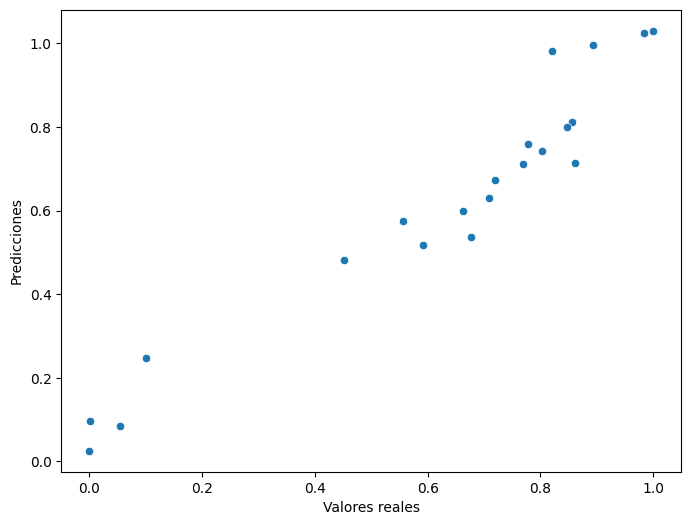

In [8]:
# Creamos el modelo de regresión lineal con librerias
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
score = modelo.score(X_test, y_test)
print("R-squared:", score)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)
print(y_pred)
print(y_test)

# Graficar los valores reales vs. las predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()


# 6- Aplicar modelo manual

In [9]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) # weights
        self.b = np.random.rand(1)                     # intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 

        #partial derivative of cost w.r.t the intercept
        
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]

        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)
              
        for i in range(epochs):
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)  
            
        return self.W, self.b

    def predict(self, X):
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product
    

R-squared: 0.5971308157464069


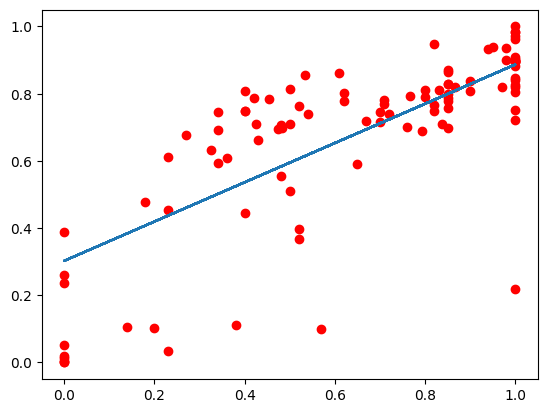

In [10]:
# Seleccionar las características que se utilizarán para ajustar el modelo

x = normalized_data["proyecto1"]
y = normalized_data['nota']

#proyecto1   proyecto2    examen 1     taller1        nota

# Ajustar la regresión lineal en el conjunto de entrenamiento
regressor = LinearRegression(n_features=1)
params = regressor.train(x, y, epochs=100, learning_rate=0.225)

#print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')

pred = regressor.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

r2 = r2_score(x,y)

print("R-squared:", r2)